# DECISION TREE WITH IRIS DATASET
Examine the dataset and perform Decision Tree algorithm.

#### Libraries to import

In [1]:
import pandas as pd # DataFrame
from sklearn.datasets import load_iris # Dataset IRIS
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Classifier + Tree visualising
from sklearn.model_selection import train_test_split # train-test splitting
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # performance metrics
import pprint as pp # beautiful print
from matplotlib import pyplot as plt # plotting libraries 
%matplotlib inline

#### Load data, check the columns' names

In [2]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Load to Pandas's DataFrame

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# Inspect the first 5 rows
df.head(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Add the target and Inspect the first 5 rows
df['target'] = data.target
df.head(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Inspect the last 5 rows
df.tail(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### Inspect the target_names, the target_values

In [7]:
list(zip(set(data.target_names), set(df['target'])))

[('setosa', 0), ('virginica', 1), ('versicolor', 2)]

## Machine Learning

#### Train - Test splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

#### Initiate with depth of 2

In [9]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

#### Plotting

Text(0.5, 1.0, 'Depth of 2')

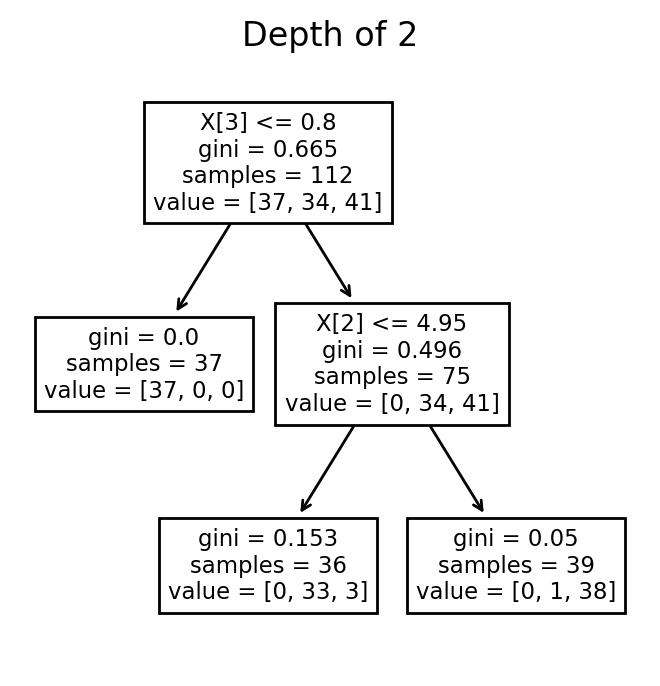

In [10]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
plot_tree(clf);
plt.title('Depth of 2')

#### Inspect the results

In [11]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

### Model Performance

In [12]:
# Predict for whole observations
y_pred = clf.predict(X_test)

In [13]:
print("CONFUSION MATRIXx:\n", confusion_matrix(y_test,y_pred))
print("\nSTATS REPORT:\n", classification_report(y_test,y_pred))
print("\nACCURACY SCORE:\n", accuracy_score(y_test, y_pred))
print("\nPREDICTION RESULTS:\n", y_pred)
print("\nDATA TESTED:\n", y_test.values)
error = 0
for i in range(len(y_pred)):
    if y_pred[i] != y_test.values[i]:
        error += 1
print("\nFALSE PREDICTED:\n", error)

CONFUSION MATRIXx:
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]

STATS REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38


ACCURACY SCORE:
 0.8947368421052632

PREDICTION RESULTS:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2]

DATA TESTED:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]

FALSE PREDICTED:
 4


#### Finding the best depth

In [14]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 8))
# List to store the average accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

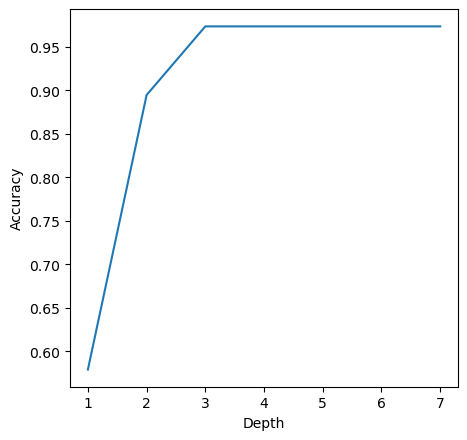

In [15]:
# Define the size of plot
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=100)

# Provide names for axes
plt.xlabel('Depth')
plt.ylabel('Accuracy')

# Plot
plt.plot(max_depth_range, accuracy);

The "Accuracy" reaches its peak from the depth == 3 onwards. 
Therefore, it is good to assign the depth = 3. 

In [16]:
accuracy[2]

0.9736842105263158

Text(0.5, 1.0, 'Depth of 3')

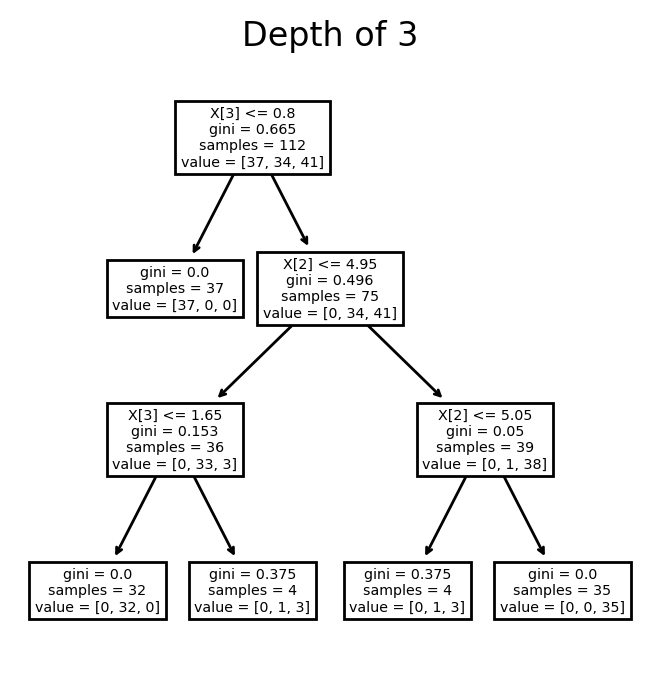

In [17]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
plot_tree(clf);
plt.title('Depth of 3')

#### Check the importance of features

In [18]:
print('Feature Importance:\n')
pp.pprint(list(zip(data.feature_names, clf.feature_importances_)))

Feature Importance:

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.4223210863950678),
 ('petal width (cm)', 0.5776789136049322)]


#### Experiment with depth = 4

Text(0.5, 1.0, 'Depth of 4')

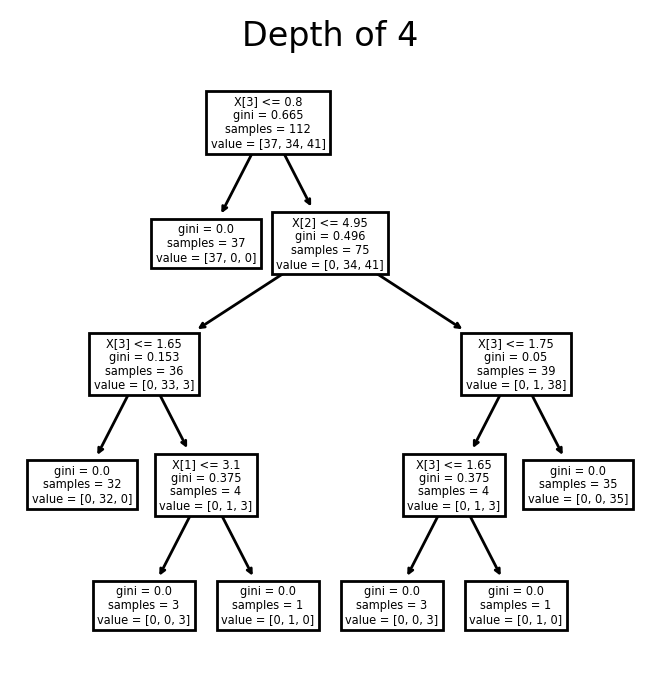

In [19]:
clf = DecisionTreeClassifier(max_depth = 4, 
                             random_state = 0)
clf.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
plot_tree(clf);
plt.title('Depth of 4')

#### Check the importance of features

In [20]:
print('Feature Importance:\n')
pp.pprint(list(zip(data.feature_names, clf.feature_importances_)))

Feature Importance:

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.02014871671863756),
 ('petal length (cm)', 0.3992752366367141),
 ('petal width (cm)', 0.5805760466446483)]
